In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [26]:
with open('Raw_delhi_tables.html') as f:
    soup = BeautifulSoup(f.read(), 'lxml')

In [27]:
months = soup.findAll('span',class_ = 'headerr')
months = [month.text for month in months]
tables = soup.findAll('table')

In [28]:
main_df = pd.DataFrame()
for itr in range(len(months)):
    df = pd.DataFrame()
    table = tables[itr]
    rows = table.findAll('tr')
    datt = table.findAll('th')[1:-1]
    datt = [pd.to_datetime(i.text + months[itr]) for i in datt ]
    for row in rows[1:]:
        row_data = row.findAll('td')[1:]
        r_d = [data.text for data in row_data[:-1]]
        row_data = []
        for i in r_d:
            if i == '\xa0':
                row_data.append(np.NaN)
            else:
                row_data.append(int(i))
        df = pd.concat([df,pd.Series(row_data)],axis = 1)
    df = pd.concat([pd.DataFrame(df.values[:,1:4]),pd.Series(df.values[:,-1])],axis=1)
    df.columns = ['Mota','Medium','Tandoori','Vehicle_Arrived']
    df['Date'] = datt
    main_df = pd.concat([main_df,df],axis=0)

In [29]:
main_df.sort_values('Date',inplace= True)

In [30]:
doyear = [aa.dayofyear for aa in main_df['Date']]
main_df['Doy'] = doyear

In [32]:
df2 = main_df.copy()
df2.index = range(len(df2))
# df2.dropna(inplace= True)

In [8]:

def interpolate_gaps(values, limit=None):
    """
    Fill gaps using linear interpolation, optionally only fill gaps up to a
    size of `limit`.
    """
    values = np.asarray(values)
    i = np.arange(values.size)
    valid = np.isfinite(values)
    filled = np.interp(i, i[valid], values[valid])

    if limit is not None:
        invalid = ~valid
        for n in range(1, limit+1):
            invalid[:-n] &= invalid[n:]
        filled[invalid] = np.nan

    return filled
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
df2['Tandoori'] = interpolate_gaps(df2.Tandoori, limit=2)
df2['Tandoori_Smooth'] = smooth_curve(df2.Tandoori.values)

In [10]:
label_ticks = []
year_0 = 2012
for i in range(82):
    month = i%12 +1 
    year = year_0 + i//12
    label_ticks.append(str(month)+'-'+str(year))
minor_x_ticks = [pd.to_datetime(i) for i in label_ticks]

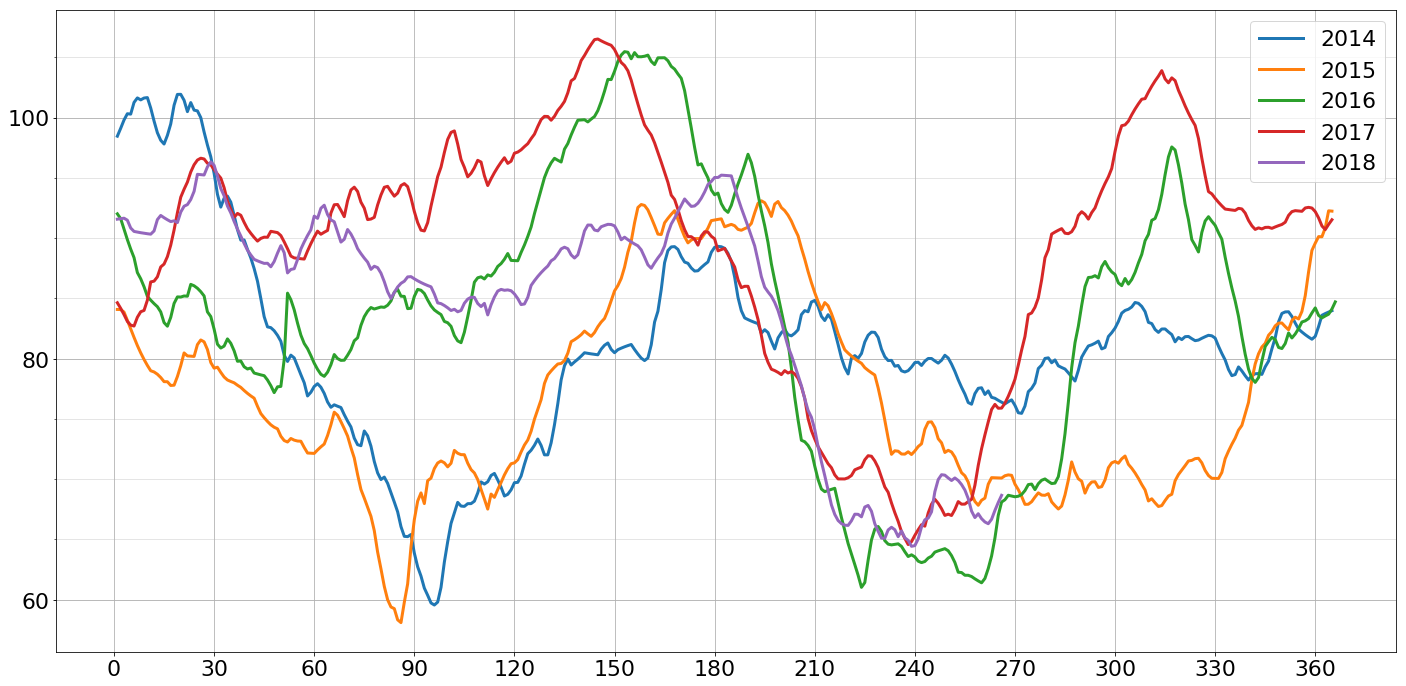

In [12]:
# \xa0
matplotlib.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
# major_x_ticks = np.arange(0, 101, 20)
major_y_ticks = np.arange(40, 141, 20)
# minor_x_ticks = np.arange(0, 101, 5)
minor_y_ticks = np.arange(40, 141, 5)
# ax.set_xticks(major_x_ticks)
# ax.set_xticks(minor_x_ticks)
ax.set_xticks(range(0,361,30))
# ax.set_xticklabels(label_ticks,rotation = 70,fontsize = 'small')
# for tick in ax.get_xticklabels():
#     tick.set_rotation(90)
ax.set_yticks(major_y_ticks)
ax.set_yticks(minor_y_ticks, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.4)
ax.grid(which='major', alpha=1)
bb = np.split(df2, df2[df2.Doy.diff()<0].index, axis = 0)
for j,i in enumerate(bb[2:]):
    ax.plot(i.Doy,i.Tandoori_Smooth,linewidth=3 ,label = 2014 + j)
# ax.plot(main_df.Date,main_df.Tandoori)
plt.tight_layout()
plt.legend()
plt.savefig('14_18_smooth.png')

In [22]:
bb[1]

,Mota,Medium,Tandoori,Vehicle_Arrived,Date,Doy


In [72]:
pd.DataFrame(df.values[1:,:],columns= df.iloc[0].values,)

,MOTA (2.5 to 3 Kg),MOTA (1.8 to 2.3 Kg),MEDIUM (1.5 to 1.7 Kg),TANDURI (1.1 to 1.3 Kg),PARENT (Per Kg),LAYER (20 Pes),BONELESS THAI (Per Kg),BONELESS CHEST (Per Kg),TANGRI-M (Per Kg),TANGRI-C (Per Kg),WINGS (Per Kg),VEHICLE ARRIVED
0,,52,50,48,50,600,130,100,110,1201,110,170
1,,53,52,50,50,600,130,100,110,130,110,140
2,,,,,,,,,,,,
3,,52,52,50,50,600,120,100,110,120,110,150
4,,50,50,48,50,550,120,100,110,120,110,110
5,,50,50,48,50,550,120,100,110,120,110,110
6,,56,50,56,56,550,130,105,120,130,100,120
7,,56,55,55,56,550,130,105,120,130,100,160
8,,66,65,70,56,500,150,115,130,130,130,120
9,,,,,,,,,,,,


In [71]:
itr = -1
main_df = pd.DataFrame()
df = pd.DataFrame()
table = tables[itr]
rows = table.findAll('tr')
datt = table.findAll('th')[1:-1]
datt = [pd.to_datetime(i.text + months[itr]) for i in datt ]
for row in rows[1:]:
    row_data = row.findAll('td')
    row_data = [data.text for data in row_data[:-1]]
    df = pd.concat([df,pd.Series(row_data)],axis = 1)

In [37]:
df2.Mota.mean()

76.43645083932854